# Desafio 6

Neste desafio, vamos praticar _feature engineering_, um dos processos mais importantes e trabalhosos de ML. Utilizaremos o _data set_ [Countries of the world](https://www.kaggle.com/fernandol/countries-of-the-world), que contém dados sobre os 227 países do mundo com informações sobre tamanho da população, área, imigração e setores de produção.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt

In [2]:
# Algumas configurações para o matplotlib.
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(10,5)

sns.set()

In [3]:
countries = pd.read_csv("countries.csv", decimal=',')

In [4]:
new_column_names = [
    "Country", "Region", "Population", "Area", "Pop_density", "Coastline_ratio",
    "Net_migration", "Infant_mortality", "GDP", "Literacy", "Phones_per_1000",
    "Arable", "Crops", "Other", "Climate", "Birthrate", "Deathrate", "Agriculture",
    "Industry", "Service"
]

countries.columns = new_column_names

countries.head(5)

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [5]:
countries.shape

(227, 20)

## Observações

Esse _data set_ ainda precisa de alguns ajustes iniciais. Primeiro, note que as variáveis numéricas estão usando vírgula como separador decimal e estão codificadas como strings. Corrija isso antes de continuar: transforme essas variáveis em numéricas adequadamente.

Além disso, as variáveis `Country` e `Region` possuem espaços a mais no começo e no final da string. Você pode utilizar o método `str.strip()` para remover esses espaços.

## Inicia sua análise a partir daqui

In [6]:
countries.dtypes

Country              object
Region               object
Population            int64
Area                  int64
Pop_density         float64
Coastline_ratio     float64
Net_migration       float64
Infant_mortality    float64
GDP                 float64
Literacy            float64
Phones_per_1000     float64
Arable              float64
Crops               float64
Other               float64
Climate             float64
Birthrate           float64
Deathrate           float64
Agriculture         float64
Industry            float64
Service             float64
dtype: object

In [7]:
countries.columns

Index(['Country', 'Region', 'Population', 'Area', 'Pop_density',
       'Coastline_ratio', 'Net_migration', 'Infant_mortality', 'GDP',
       'Literacy', 'Phones_per_1000', 'Arable', 'Crops', 'Other', 'Climate',
       'Birthrate', 'Deathrate', 'Agriculture', 'Industry', 'Service'],
      dtype='object')

## Questão 1

Quais são as regiões (variável `Region`) presentes no _data set_? Retorne uma lista com as regiões únicas do _data set_ com os espaços à frente e atrás da string removidos (mas mantenha pontuação: ponto, hífen etc) e ordenadas em ordem alfabética.

In [8]:
def q1():
    region = countries['Region'].unique()
    region = [x.strip(' ') for x in region]
    region.sort()
    return list(region)

In [9]:
q1()

['ASIA (EX. NEAR EAST)',
 'BALTICS',
 'C.W. OF IND. STATES',
 'EASTERN EUROPE',
 'LATIN AMER. & CARIB',
 'NEAR EAST',
 'NORTHERN AFRICA',
 'NORTHERN AMERICA',
 'OCEANIA',
 'SUB-SAHARAN AFRICA',
 'WESTERN EUROPE']

## Questão 2

Discretizando a variável `Pop_density` em 10 intervalos com `KBinsDiscretizer`, seguindo o encode `ordinal` e estratégia `quantile`, quantos países se encontram acima do 90º percentil? Responda como um único escalar inteiro.

In [10]:
from sklearn.preprocessing import KBinsDiscretizer

countries_new = countries.copy()

disc = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
X = countries_new['Pop_density'].values.reshape(-1, 1)

countries_new['Cat_pop_dens'] = disc.fit_transform(X)
countries_new['Cat_pop_dens'][countries_new['Cat_pop_dens']>8].count()

23

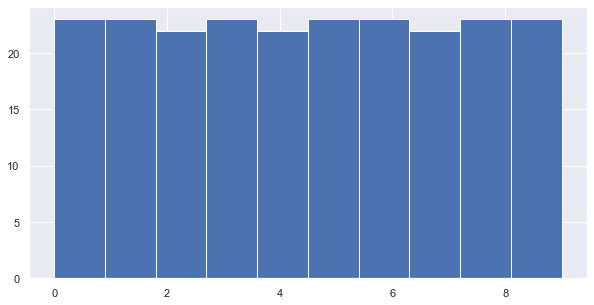

In [11]:
countries_new['Cat_pop_dens'].hist();

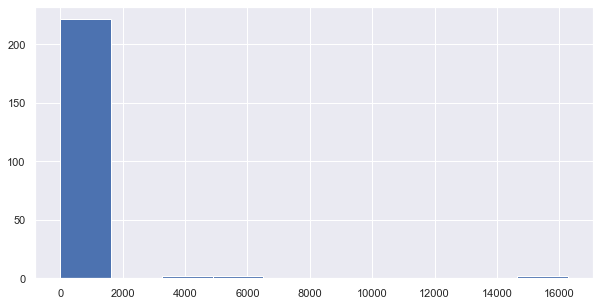

In [12]:
countries_new['Pop_density'].hist(bins=10);

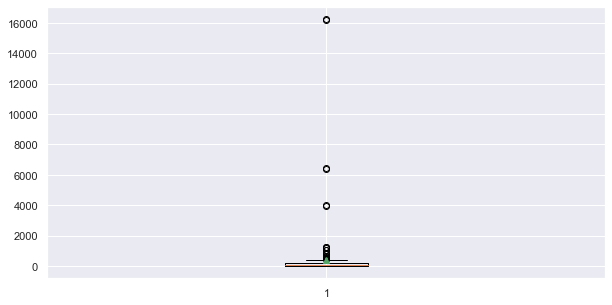

In [13]:
plt.boxplot(X, showmeans=True);

In [14]:
def q2():
    disc = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
    countries2 = countries.copy()
    X = countries2['Pop_density'].values.reshape(-1, 1)
    countries2['Cat_pop_dens'] = disc.fit_transform(X)
    return countries2['Cat_pop_dens'][countries2['Cat_pop_dens']>8].count()

In [15]:
q2()

23

https://jorisvandenbossche.github.io/blog/2018/05/28/scikit-learn-columntransformer/

# Questão 3

Se codificarmos as variáveis `Region` e `Climate` usando _one-hot encoding_, quantos novos atributos seriam criados? Responda como um único escalar.

In [16]:
countries['Climate'] = countries['Climate'].fillna(0).astype(str)

In [17]:
# Criando pipeline de tranformação
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline

preprocess = ColumnTransformer(transformers=[('One Hot', OneHotEncoder(), ['Climate', 'Region'])
                               , ('Scale', StandardScaler(), ['Population'])]
                               , remainder='passthrough')

new_countries = preprocess.fit_transform(countries)

# One Hot Columns
preprocess_columns = preprocess.transformers_[0][1].get_feature_names(['Climate', 'Region'])

new_countries = pd.DataFrame(new_countries) #columns=preprocess_columns

In [18]:
# One Hot Encoder
ohe = OneHotEncoder(sparse=False)
encoded = ohe.fit_transform(countries[['Region', 'Climate']])
encoded.shape[1]

18

In [19]:
def q3():
    OHE = OneHotEncoder(sparse=False)
    encoded = OHE.fit_transform(countries[['Region', 'Climate']])
    return encoded.shape[1]

In [20]:
q3()

18

## Questão 4

Aplique o seguinte _pipeline_:

1. Preencha as variáveis do tipo `int64` e `float64` com suas respectivas medianas.
2. Padronize essas variáveis.

Após aplicado o _pipeline_ descrito acima aos dados (somente nas variáveis dos tipos especificados), aplique o mesmo _pipeline_ (ou `ColumnTransformer`) ao dado abaixo. Qual o valor da variável `Arable` após o _pipeline_? Responda como um único float arredondado para três casas decimais.

In [21]:
test_country = [
    'Test Country', 'NEAR EAST', -0.19032480757326514,
    -0.3232636124824411, -0.04421734470810142, -0.27528113360605316,
    0.13255850810281325, -0.8054845935643491, 1.0119784924248225,
    0.6189182532646624, 1.0074863283776458, 0.20239896852403538,
    -0.043678728558593366, -0.13929748680369286, 1.3163604645710438,
    -0.3699637766938669, -0.6149300604558857, -0.854369594993175,
    0.263445277972641, 0.5712416961268142
]

test_country_new = [i for i in test_country if isinstance(i, (int, float))]

In [22]:
countries['Climate'] = countries['Climate'].astype(float)

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

numeric_variables = countries.select_dtypes(include=['float64', 'int64'])


pipeline = Pipeline([('Imputer', SimpleImputer(missing_values=np.nan, strategy='median'))
                     , ('Scaler', StandardScaler())
                    ])

countries_trans = pipeline.fit_transform(countries[numeric_variables.columns])

countries_trans = pd.DataFrame(countries_trans, columns = numeric_variables.columns)

In [24]:
numeric_variables.columns.shape

(18,)

In [25]:
def q4():
    numeric_variables = countries.select_dtypes(include=['float64', 'int64'])


    pipeline = Pipeline([('Imputer', SimpleImputer(missing_values=np.nan, strategy='median'))
                         , ('Scaler', StandardScaler())
                        ])

    pipeline.fit(countries[numeric_variables.columns])

    # Aplicando num novo dado
    test = pipeline.transform([test_country_new])
    result = pd.DataFrame(test, columns = numeric_variables.columns)
    return float(result['Arable'].values.round(3))

In [26]:
q4()

-1.047

## Questão 5

Descubra o número de _outliers_ da variável `Net_migration` segundo o método do _boxplot_, ou seja, usando a lógica:

$$x \notin [Q1 - 1.5 \times \text{IQR}, Q3 + 1.5 \times \text{IQR}] \Rightarrow x \text{ é outlier}$$

que se encontram no grupo inferior e no grupo superior.

Você deveria remover da análise as observações consideradas _outliers_ segundo esse método? Responda como uma tupla de três elementos `(outliers_abaixo, outliers_acima, removeria?)` ((int, int, bool)).

In [27]:
Q1 = countries['Net_migration'].quantile(0.25)
Q3 = countries['Net_migration'].quantile(0.75)

IQR = Q3-Q1

lim_inf = (Q1-(1.5*IQR))
lim_sup = (Q3+(1.5*IQR))
outliers = ((countries['Net_migration'] > lim_sup) | (countries['Net_migration'] < lim_inf)).sum()

print('Número de outliers: {}'.format(outliers))
print('Itens na váriavel: {}'.format(countries.shape[0]))
print('Percentual outliers: {}%'.format(round((outliers/countries.shape[0])*100)))

Número de outliers: 50
Itens na váriavel: 227
Percentual outliers: 22.0%


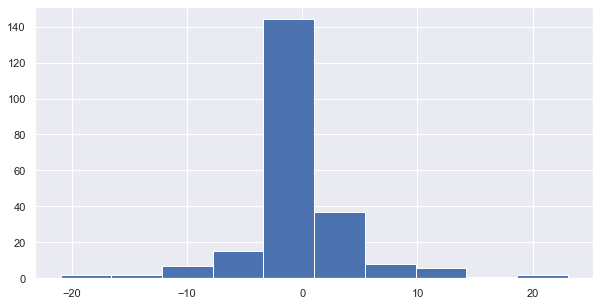

In [28]:
countries['Net_migration'].hist();

In [29]:
def q5():
    q1 = countries['Net_migration'].quantile(0.25)
    q3 = countries['Net_migration'].quantile(0.75)

    IQR = q3-q1

    lim_inf = (q1-(1.5*IQR))
    lim_sup = (q3+(1.5*IQR))
    sup = (countries['Net_migration'] > lim_sup).sum()
    inf = (countries['Net_migration'] < lim_inf).sum()
    return tuple([inf, sup, False])

In [30]:
q5()

(24, 26, False)

## Questão 6
Para as questões 6 e 7 utilize a biblioteca `fetch_20newsgroups` de datasets de test do `sklearn`

Considere carregar as seguintes categorias e o dataset `newsgroups`:

```
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)
```


Aplique `CountVectorizer` ao _data set_ `newsgroups` e descubra o número de vezes que a palavra _phone_ aparece no corpus. Responda como um único escalar.

In [37]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer

In [38]:
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)

In [40]:
newsgroup.target_names

['comp.graphics', 'rec.motorcycles', 'sci.electronics']

In [41]:
len(newsgroup.data)

1773

In [45]:
count_vect = CountVectorizer()
count_fit = count_vect.fit_transform(newsgroup.data)
count_fit.shape

(1773, 27335)

In [47]:
word = u'phone' # u - unicode
phone = count_vect.vocabulary_.get(f"{word.lower()}")

In [48]:
count_fit[:, phone].sum()

213

In [49]:
def q6():
    return count_fit[:, phone].sum()

In [50]:
q6()

213

## Questão 7

Aplique `TfidfVectorizer` ao _data set_ `newsgroups` e descubra o TF-IDF da palavra _phone_. Responda como um único escalar arredondado para três casas decimais.

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
newsgroup_tfidf = tfidf.fit_transform(newsgroup.data)
newsgroup_tfidf.shape

(1773, 27335)

In [56]:
td_idf_word = tfidf.get_feature_names().index(word)
td_idf_word

19211

In [55]:
round(newsgroup_tfidf[:, td_idf_word].sum(), 3)

8.888

In [57]:
def q7():
    return round(newsgroup_tfidf[:, td_idf_word].sum(), 3)

In [58]:
q7()

8.888

https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html